# EDA: Third try

This is the third irritation of doing an EDA on the dataset. This EDA is done after the first try of creating an AI.

> The goal of this EDA is to find a strong correlation that makes more sense to predict compared to the previous one (total price and day of week)

## Step 1: retrieving the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

### 1.1 Reading the CSV file

In [2]:
df = pd.read_csv("Receipts August 2022 - V6.csv")
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['time of exit'] = pd.to_datetime(df['time of exit'], format='%H:%M:%S')

df.head(5)

,id,date,receipt price,time of exit
0,11877,2022-08-02,19.45,1900-01-01 16:32:00
1,11878,2022-08-02,35.90,1900-01-01 16:43:00
2,11879,2022-08-12,49.80,1900-01-01 17:49:00
3,11880,2022-08-02,68.10,1900-01-01 18:23:00
4,11881,2022-08-28,25.45,1900-01-01 16:19:00


#### 1.1.1 Checking whether the datatypes are valid

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             187 non-null    int64         
 1   date           187 non-null    datetime64[ns]
 2   receipt price  187 non-null    float64       
 3   time of exit   187 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 6.0 KB


In [4]:
df.describe(include='all', datetime_is_numeric=True)

,id,date,receipt price,time of exit
count,187.000000,187,187.000000,187
mean,12011.267380,2022-08-13 11:40:44.919785984,60.878342,1900-01-01 18:45:36.256684288
min,11877.000000,2022-08-02 00:00:00,14.600000,1900-01-01 14:34:00
25%,11941.500000,2022-08-06 00:00:00,43.200000,1900-01-01 17:50:00
50%,12011.000000,2022-08-12 00:00:00,51.300000,1900-01-01 18:59:00
75%,12081.500000,2022-08-21 00:00:00,71.725000,1900-01-01 19:45:00
max,12137.000000,2022-08-31 00:00:00,268.850000,1900-01-01 21:30:00
std,79.079402,NaN,33.311383,NaN


### 1.2 Adding date and time columns for easier handling

In [5]:
df['dow'] = df['date'].dt.day_of_week
df['is w'] = df['dow'] > 4
df['is nem'] = df['dow'].apply(lambda dow: 3 < dow < 6)
df['toe hour'] = df['time of exit'].dt.hour
df['toe minute'] = df['time of exit'].dt.minute
df['toe as n'] = df['toe hour'] + df['toe minute'] / 60
df = df.drop(columns=['id'])

df.head(5)

,date,receipt price,time of exit,dow,is w,is nem,toe hour,toe minute,toe as n
0,2022-08-02,19.45,1900-01-01 16:32:00,1,False,False,16,32,16.533333
1,2022-08-02,35.90,1900-01-01 16:43:00,1,False,False,16,43,16.716667
2,2022-08-12,49.80,1900-01-01 17:49:00,4,False,True,17,49,17.816667
3,2022-08-02,68.10,1900-01-01 18:23:00,1,False,False,18,23,18.383333
4,2022-08-28,25.45,1900-01-01 16:19:00,6,True,False,16,19,16.316667


#### 1.3.1 Checking whether the datatypes are valid

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           187 non-null    datetime64[ns]
 1   receipt price  187 non-null    float64       
 2   time of exit   187 non-null    datetime64[ns]
 3   dow            187 non-null    int64         
 4   is w           187 non-null    bool          
 5   is nem         187 non-null    bool          
 6   toe hour       187 non-null    int64         
 7   toe minute     187 non-null    int64         
 8   toe as n       187 non-null    float64       
dtypes: bool(2), datetime64[ns](2), float64(2), int64(3)
memory usage: 10.7 KB


> Doubting if `is w` and `is nem` are going to be an issue because they are booleans...

In [7]:
df.describe(include='all', datetime_is_numeric=True)

,date,receipt price,time of exit,dow,is w,is nem,toe hour,toe minute,toe as n
count,187,187.000000,187,187.000000,187,187,187.000000,187.000000,187.000000
unique,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,117,123,NaN,NaN,NaN
mean,2022-08-13 11:40:44.919785984,60.878342,1900-01-01 18:45:36.256684288,3.540107,NaN,NaN,18.267380,29.561497,18.760071
min,2022-08-02 00:00:00,14.600000,1900-01-01 14:34:00,1.000000,NaN,NaN,14.000000,0.000000,14.566667
25%,2022-08-06 00:00:00,43.200000,1900-01-01 17:50:00,2.000000,NaN,NaN,17.000000,15.500000,17.833333
50%,2022-08-12 00:00:00,51.300000,1900-01-01 18:59:00,4.000000,NaN,NaN,18.000000,28.000000,18.983333
75%,2022-08-21 00:00:00,71.725000,1900-01-01 19:45:00,5.000000,NaN,NaN,19.000000,43.000000,19.750000
max,2022-08-31 00:00:00,268.850000,1900-01-01 21:30:00,6.000000,NaN,NaN,21.000000,59.000000,21.500000


### 1.3 Column definition

* date
    * <small>The date of the session</small>
* receipt price
    * <small>The total price of the receipt</small>
* time of exit
    * <small>The time at which the guests leave</small>
* dow
    * <small>The day of the week as a number (mo: closed, tu: 1, wo: 2, ...)</small>
* is w
    * <small>True if it is the weekend (Saturday and Sunday)</small>
* is nem 
    * <small>No early morning. (Friday and Saturday)</small>
* toe* hour
    * <small>The hour of exit</small>
* toe minute
    * <small>The minute of exit</small>
* toe as n**
    * <small>The hour of exit as one number with the minute as decimal (17:45 -> 17,75)</small>



\* *toe = Time of exit* <br>
** *toe as n = Time of exit as a number. It is added because it might produce different results than if the hour and minute are separated*

## Step 2: Cleaning the data
Previous EDA's have shown that there are some outliers that need to be removed for a preciser model. The chart below displays them.

c:\Users\Jussi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='toe as n', ylabel='receipt price'>

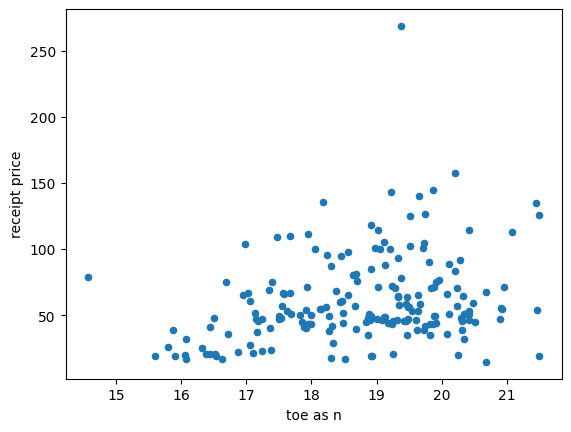

In [8]:
df.plot.scatter(x = 'toe as n', y = 'receipt price')

The image below has the outliers marked

![receipt price vs toe as n](receipt_price-vs-toe_as_n-scatter-outliers-marked.png "receipt price vs toe as n")

Lets remove these records

<AxesSubplot: xlabel='toe as n', ylabel='receipt price'>

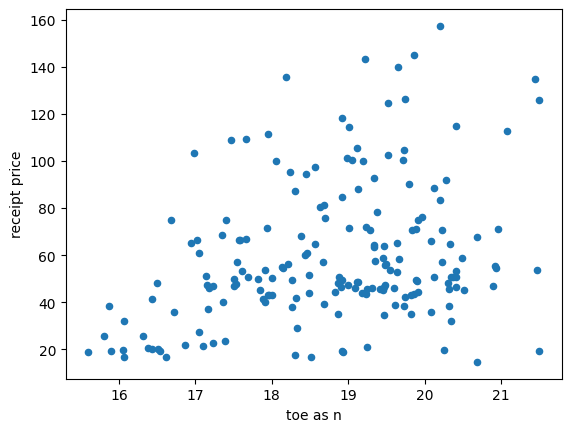

In [9]:
df = df[df['toe as n'] > 15]
df = df[df['receipt price'] < 200]

df.plot.scatter(x = 'toe as n', y = 'receipt price')

## Step 3: Playing with the data

The purpose of this chapter is to explore the data and obtain findings that might not even be useful to the AI, but to the restaurant.

Let's kickoff with some density charts.

<AxesSubplot: xlabel='receipt price', ylabel='Density'>

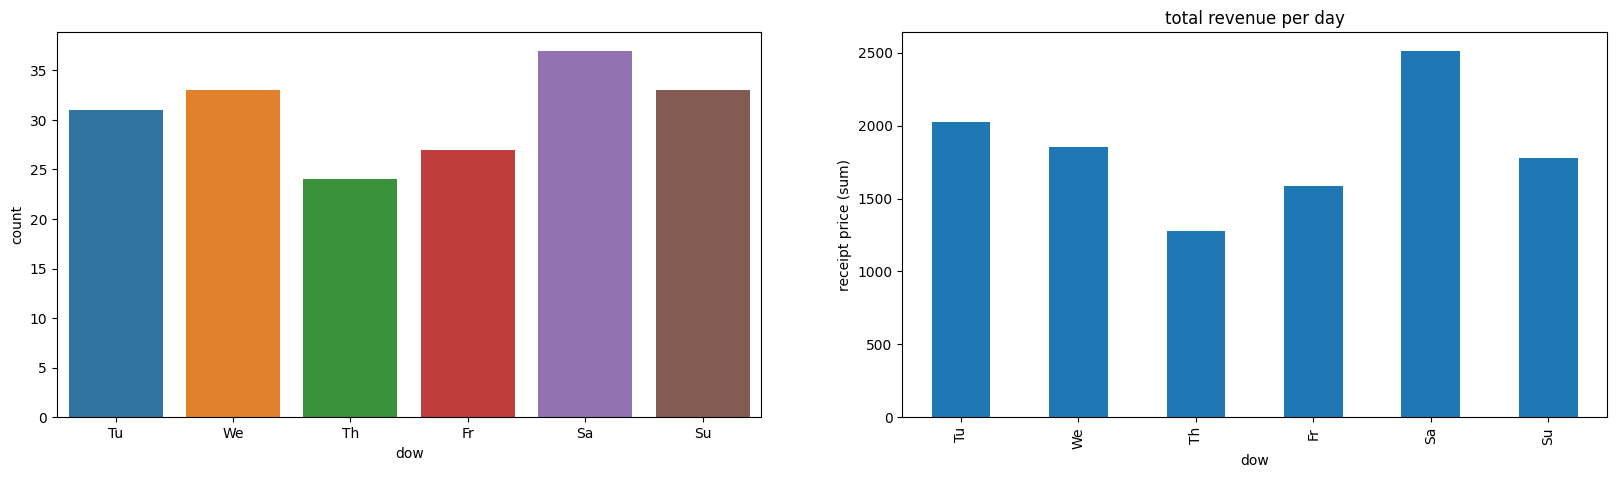

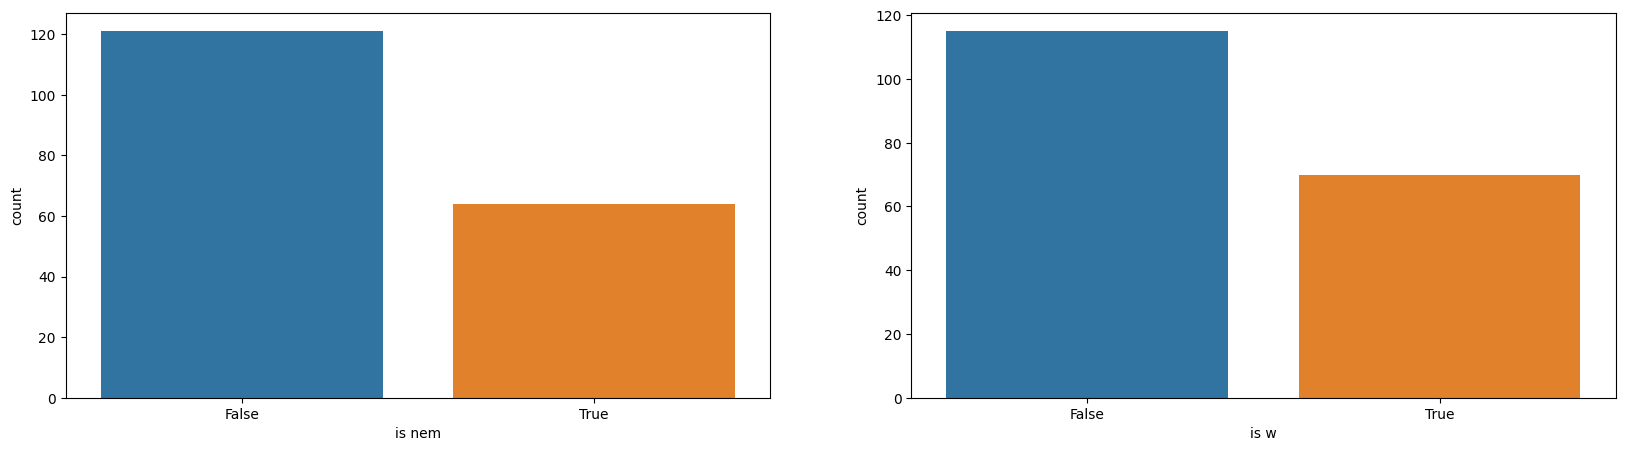

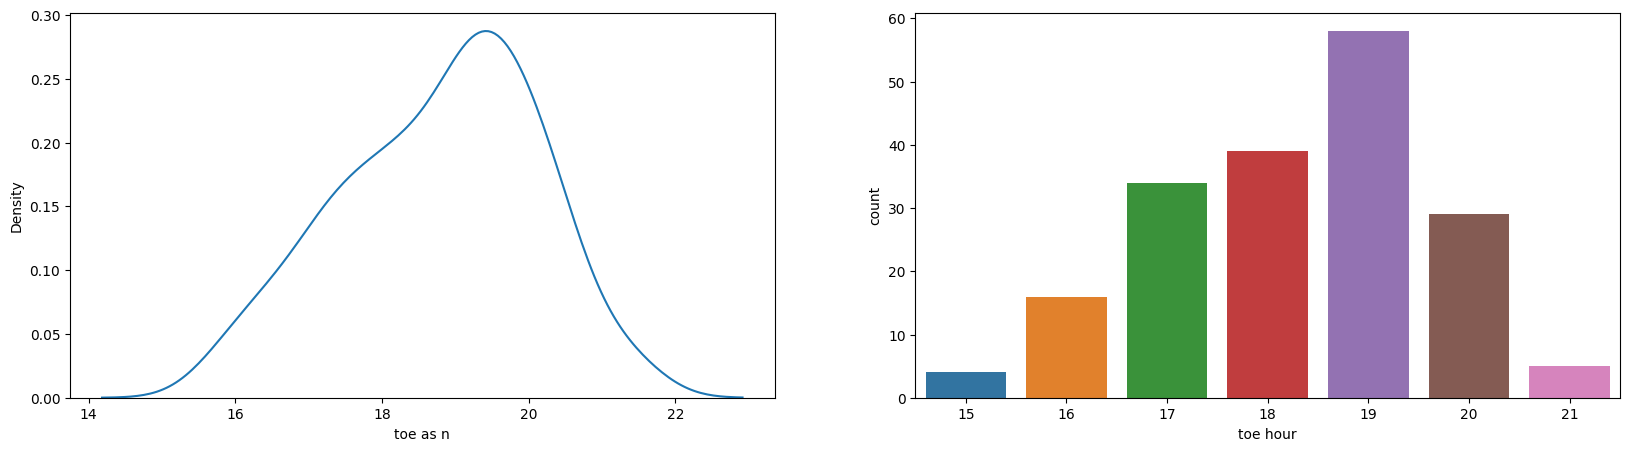

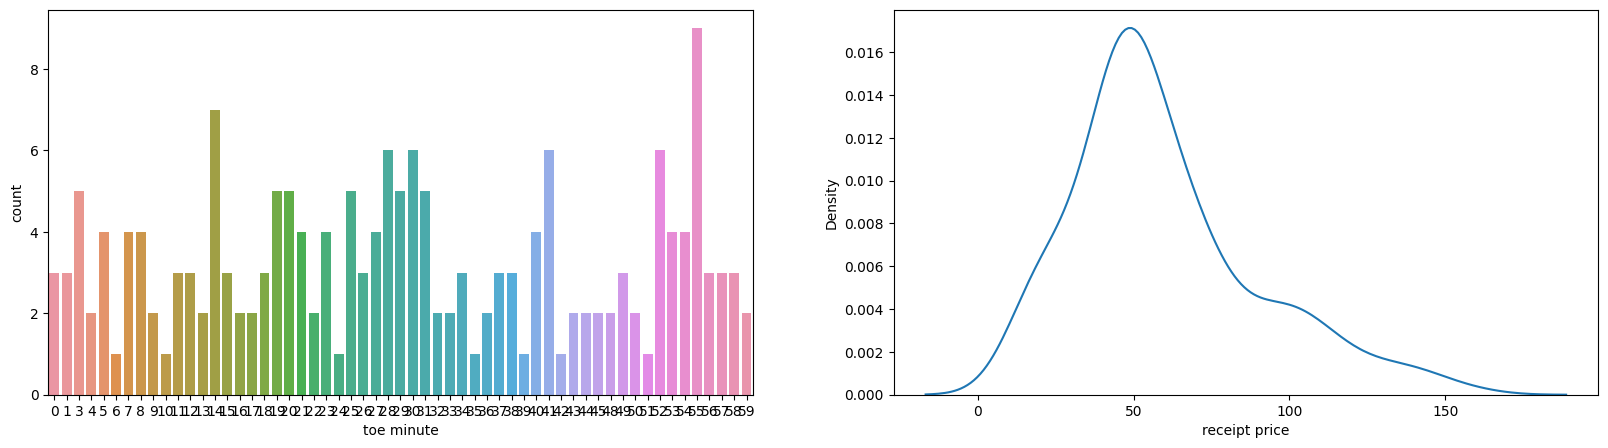

In [10]:
fig, ax =   plt.subplots(1, 2, figsize=(20, 5))
fig, ax2 = plt.subplots(1, 2, figsize=(20, 5))
fig, ax3 = plt.subplots(1, 2, figsize=(20, 5))
fig, ax4 = plt.subplots(1, 2, figsize=(20, 5))

dayLabels = ["Tu", "We", "Th", "Fr", "Sa", "Su"]

# dow
sns.countplot(x=df["dow"], ax=ax[0])
ax[0].set_xticklabels(dayLabels)
# receipt price sum
df[['dow', 'receipt price']].groupby('dow').sum().plot(kind='bar', legend=False, ylabel='receipt price (sum)', ax=ax[1])
ax[1].set_xticklabels(dayLabels)
ax[1].set_title("total revenue per day")
# is nem
sns.countplot(x=df["is nem"], ax=ax2[0])
# is w
sns.countplot(x=df["is w"], ax=ax2[1])
# toe as n
sns.kdeplot(x=df["toe as n"], ax=ax3[0])
# toe hour
sns.countplot(x=df["toe hour"], ax=ax3[1])
# toe minute
sns.countplot(x=df["toe minute"], ax=ax4[0])
# receipt price
sns.kdeplot(x=df["receipt price"], ax=ax4[1])


Observations:
- the `dow` countplot shows that Saturday (5) is the busiest day and Thursday (3) the quitest.
- the `receipt price` densityplot shows that the average receipt price is a little above €50.
- the `is nem` and `is w` countplot together show that there are more customers in the weekend than on 'nem' days.
- the `toe hour` countplot has "19" as the biggest bar. This means that most people leave between 19:00 and 20:00.
- the `toe minute` countplot shows no pattern. This means that the minute has no influence on when people leave.
- the "total revenue per day" shows that most revenue

In [11]:
fig = px.scatter(df, x="dow", y="toe as n", size="receipt price")
fig.show()

In [12]:
# Let's try scaling the bubbles
fig = go.Figure(data=[go.Scatter(
    x=df["dow"],
    y=df["toe as n"],
    mode='markers',
    marker=dict(
        size=df["receipt price"],
        sizemode='area',
        sizeref=2.*max(df["receipt price"])/(40.**2),
        sizemin=4
    )
)])

fig.show()

In [13]:
fig = px.scatter_3d(df, x='dow', y='receipt price', z='toe as n', color='toe hour')
fig.show()

In [14]:
z_data = pd.read_csv('test.csv')

fig = go.Figure(data=[go.Surface(z=df[["toe hour", "toe minute", "receipt price"]])])

fig.show()

<AxesSubplot: ylabel='receipt price'>

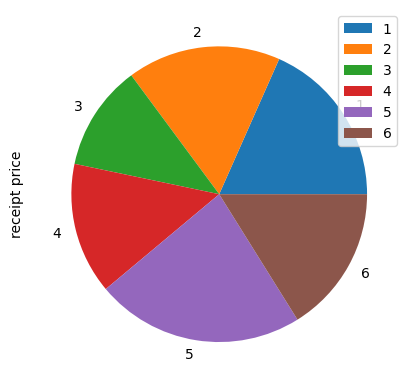

In [15]:
df[['dow', 'receipt price']].groupby('dow').sum().plot(kind='pie', y="receipt price")

In [1]:
sns.displot(y=df["receipt price"], x=df["toe as n"])

NameError: name 'sns' is not defined

## Step 4: Finding relations

The below chart will give a quick look into possible relations between the columns

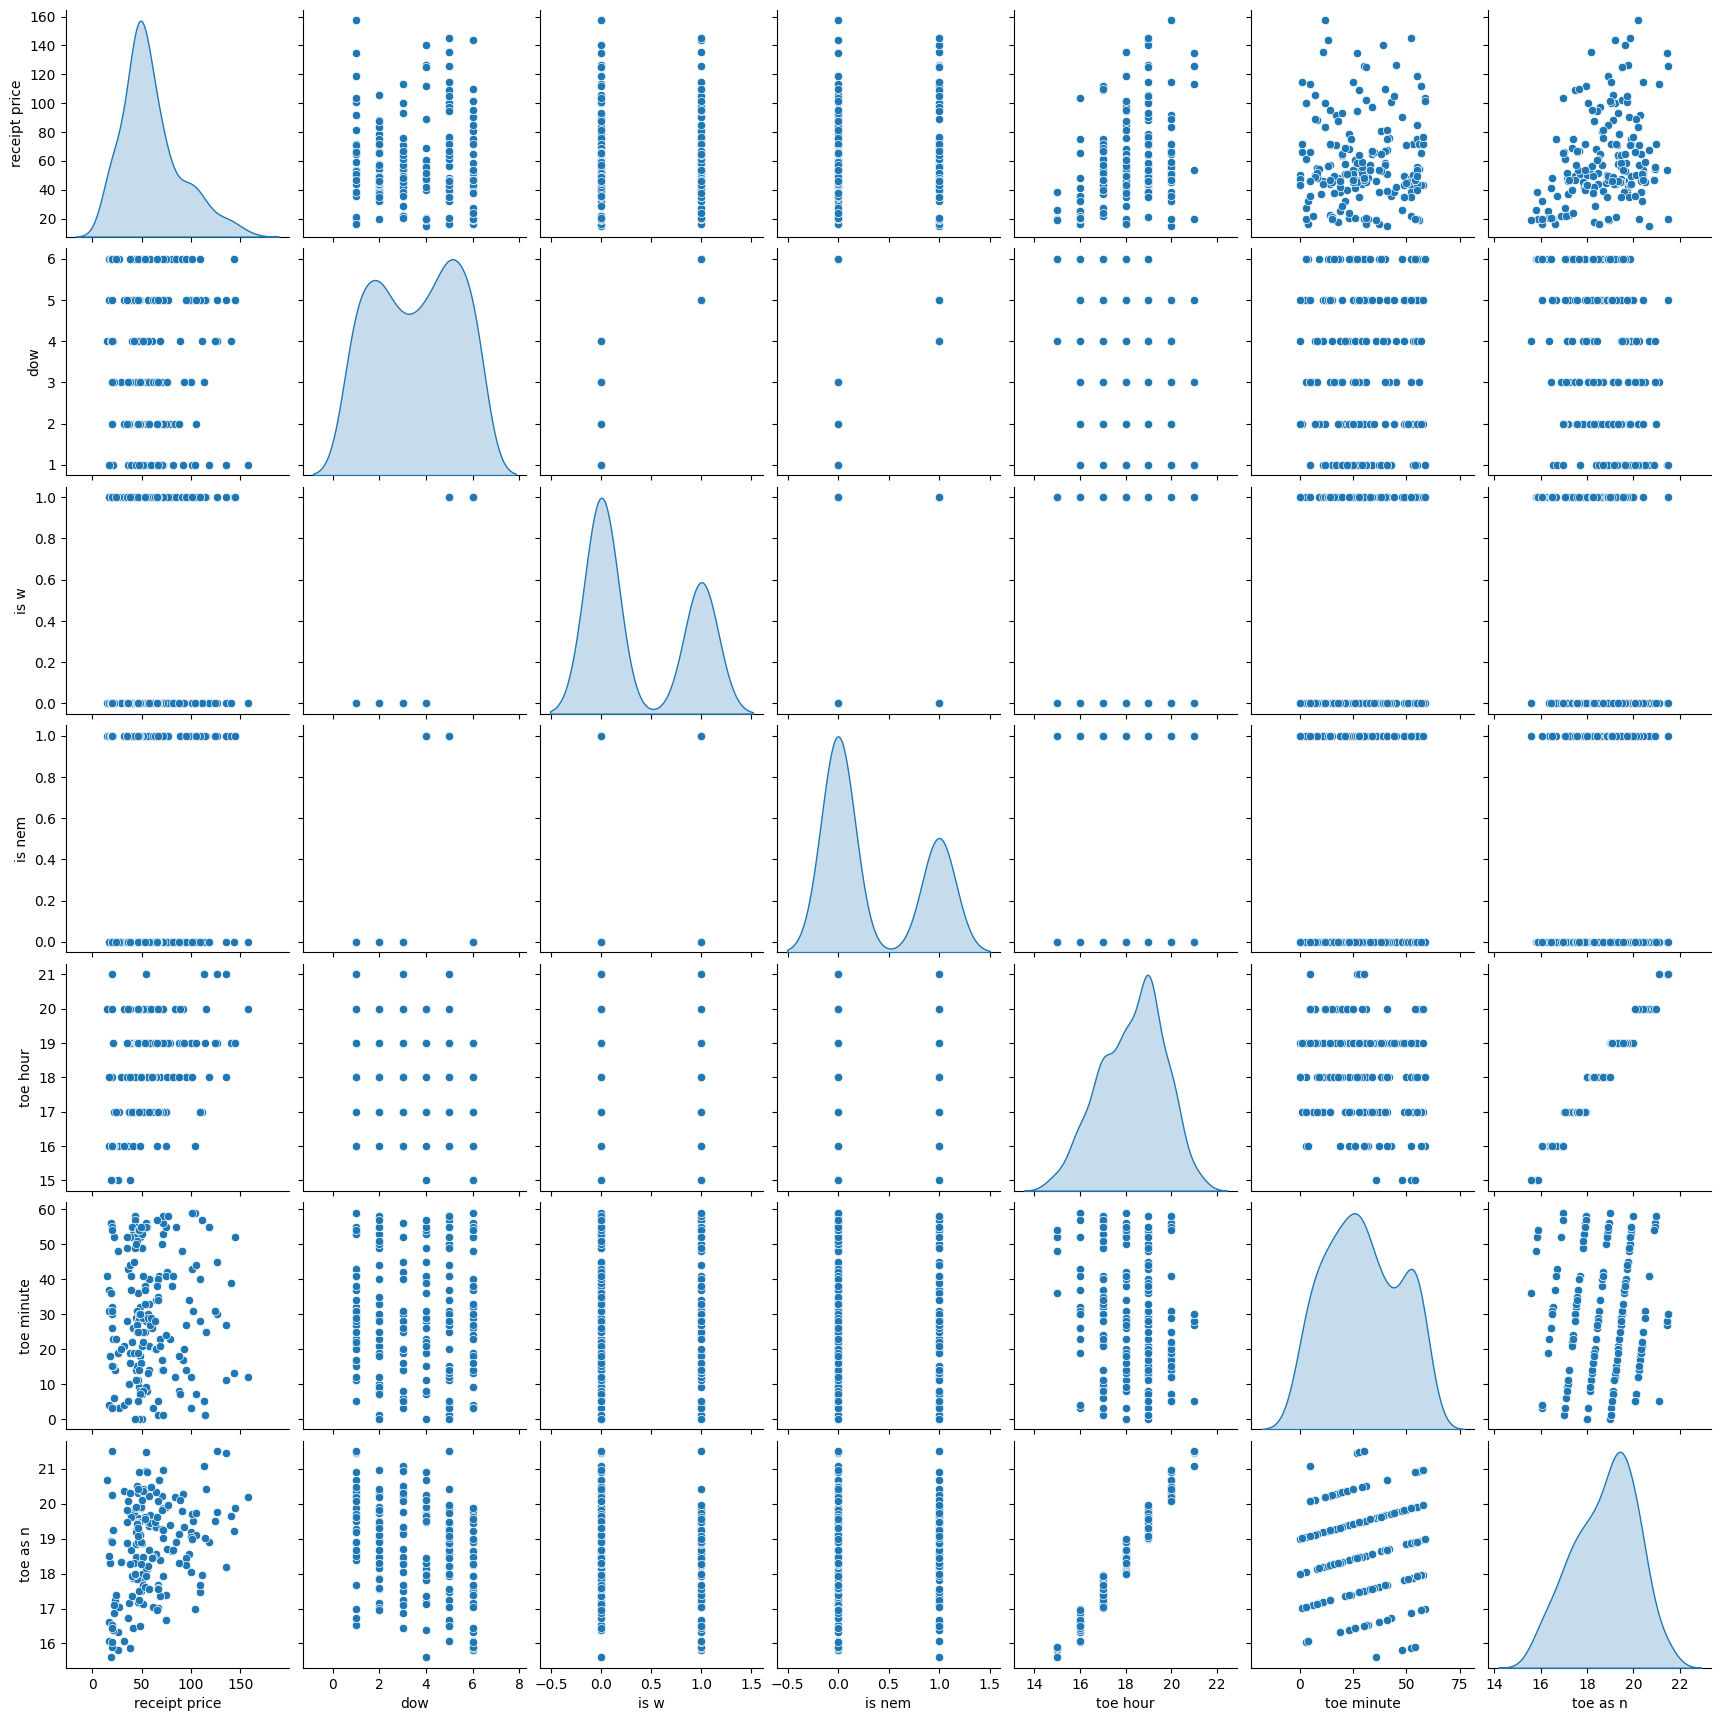

In [16]:
sns.pairplot(df, diag_kind='kde')

> This plot seems to show that the booleans `is w` and `is nem` are treated as numbers.

A couple plots show some sort of pattern:
- `toe as n` vs `receipt price`
- `toe hour` vs `receipt price` (<small>will be ignored because `toe as n` is preciser</small>)
- `dow` vs `receipt price`
- `toe minute` vs `receipt price`

Let's remember these observations and look for more correlations with a correlation matrix.

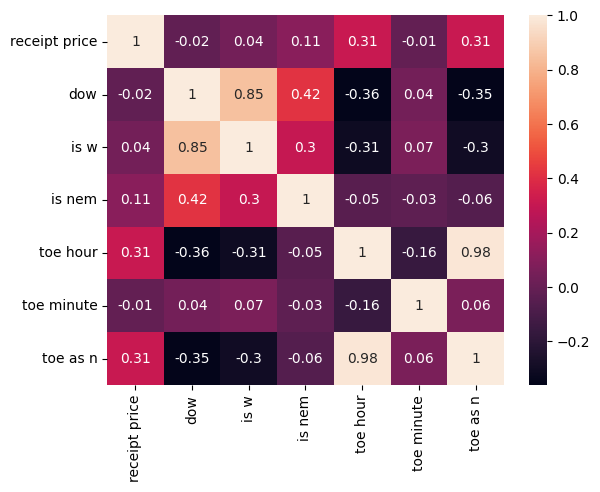

In [17]:
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.show()

### 2.1 Correlation matrix results

#### 2.1.1 Stronger numbers/results:
1. `dow` and `toe hour/toe as n`: -0.36/-0.35
2. `is w` and `toe hour/toe as n`: -0.31/-0.3
3. `receipt price` and `toe hour/toe as n`: 0.31

**1. `dow` and `toe hour/toe as n`: -0.36/-0.35** <br>
This correlation does not make any sense: dow is the day of the week as a number. So the bigger the number, the closer it is to the weekend. A negative correlation means that when one increases, the other decreases. So if it's closer to the weekend, people leave earlier? Or maybe the other way around: people stay longer at the beginning of the week? Out of experience, these are not correct. (But data never lies ...?)

**2. `is w` and `toe hour/toe as n`: -0.31/-0.3** <br>
This correlation points to a conclusion similar to the first one: People leave earlier if it is a weekend day? Very interesting...

**3. `receipt price` and `toe hour/toe as n`: 0.31** <br>
This correlation does make sense. The `receipt price` increases as the `toe` increases.

#### 2.1.2 Weaker numbers/results:
1. `receipt price` and `is nem`: 0.11

These correlation nubers are very low, but 2 assumptions could be made:

**1. `receipt price` and `is nem`: 0.11**<br>
Receipt price increases if the next day is "no early morning". Why? Because nem == longer stay == more spending.

Perhaps there would be stronger correlations with a larger dataset.

### 2.2 Researching found correlations

I will research the following correlations:
1. `toe as n`* and `dow` (-0.35)
    * <small>Current assumption: `toe as n` increases as `dow` increases</small>
    * <small>Conclusion prediction: False -> the corr rating is negative</small>
2. `toe as n` and `is w` (-0.3)
    * <small>Current assumption: `toe as n` is bigger if `is w` is true</small>
    * <small>Conclusion prediction: False -> the corr rating is negative</small>
3. `toe as n` and `is nem` (-0.06)
    * <small>Current assumption: `toe as n` is bigger if `is nem` is true</small>
    * <small>Conclusion prediction: False -> the corr rating is negative, but also very low. Probably no conclusion.</small>
4. `receipt price` and `toe as n` (0.31)
    * <small>Current assumption: `receipt price` increases with `toe as n`</small>
    * <small>Conclusion prediction: True -> the corr rating is positive and relatively big (compared to the other corr ratings)</small>
5. `receipt price` and `dow` (-0.02)
    * <small>Current assumption: 'receipt price' increases as 'dow' increases</small>
    * <small>Conclusion prediction: False -> the corr rating is negative, but also very low. Probably no conclusion.</small>
6. `receipt price` and `is nem` (0.11)
    * <small>Current assumption: 'receipt price' is bigger if 'is nem' is true</small>
    * <small>Conclusion prediction: True -> the corr rating is positive</small>
7. `receipt price` and `is w` (0.04)
    * <small>Current assumption: 'receipt price' is bigger if 'is w' is true</small>
    * <small>Conclusion prediction: False -> the corr rating is negative, but also very low. Probably no conclusion.</small>

\* I picked `toe as n` instead of `toe hour` because it is more precise.

#### 2.2.1 Corr 1: `toe as n` and `dow`

<small>Correlation matrix score = -0.35.</small>

Original assumption: `toe as n` increases as `dow` increases <br>
Original conclusion prediction: False -> the corr rating is negative

Let's start of with a simple scatter plot.

c:\Users\Jussi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<AxesSubplot: xlabel='dow', ylabel='toe as n'>

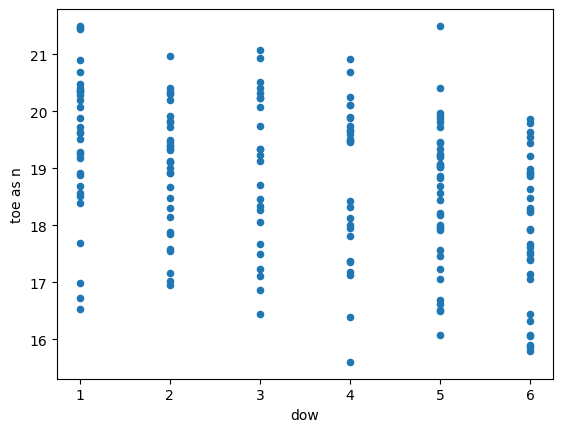

In [18]:
df.plot.scatter(x = 'dow', y = 'toe as n')

The plot shows that people leave earlier as the week progresses. The figure below makes it more obvious to see:

Text(0, 0.5, 'dow')

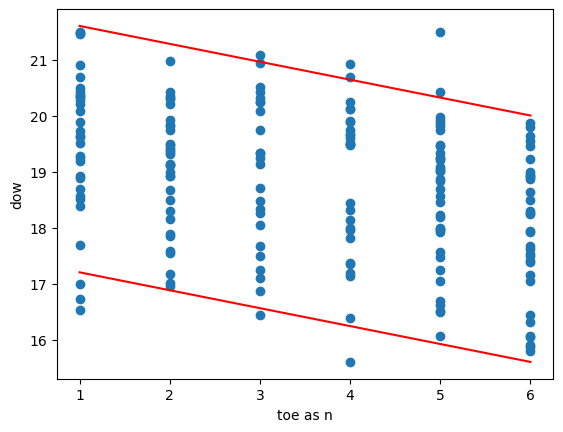

In [19]:
ax = plt.axes()
ax.scatter(df['dow'], df['toe as n'])
ax.plot([1, 6], [21.6, 20], '-r')
ax.plot([1, 6], [17.2, 15.6], '-r')

ax.set_xlabel('toe as n')
ax.set_ylabel('dow')

The chart aligns with the negative correlation number. But it is not what I expected based on my experience in the restaurant. Something might went wrong with the data. 

To dubbel check, I created the same plot in Google Spreadsheets, where the data comes from. This produced the following chart:

![toe vs dow](toe-vs-dow-scatter.png "toe vs dow")

Basically the same result. (The only difference is the anomaly on dow=1, close to 14:00, which was removed from the dataframe)

#### **Conclusion 1: Guests leave earlier as the week progresses**. The original assumption was incorrect and the conclusion prediction was correct.

##### 2.2.1.1 Diving deeper
The dots on the plot show an interesting pattern. They are cluttered on some toe's and very seperated on other toe's. Maybe some other plots will give more insight.

<AxesSubplot: xlabel='dow', ylabel='toe as n'>

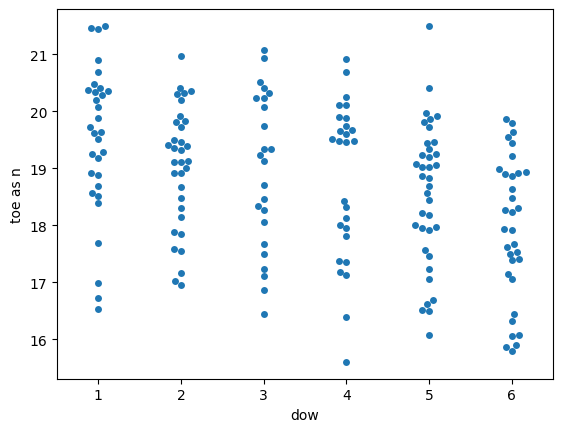

In [20]:
sns.swarmplot(x='dow', y='toe as n', data=df)

Observation: no dots on friday around 19:00h. No logical cause.

<AxesSubplot: xlabel='dow', ylabel='toe as n'>

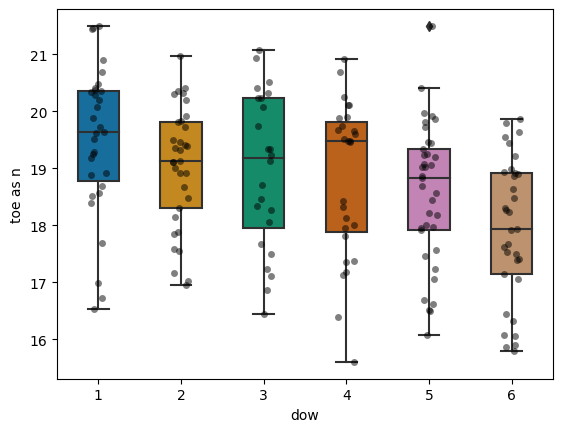

In [21]:
sns.boxplot(x='dow', y='toe as n', data=df, width=0.5, palette="colorblind")
sns.stripplot(x='dow', y='toe as n', data=df, jitter=True, marker='o', alpha=0.5, color='black')

<AxesSubplot: xlabel='dow', ylabel='toe as n'>

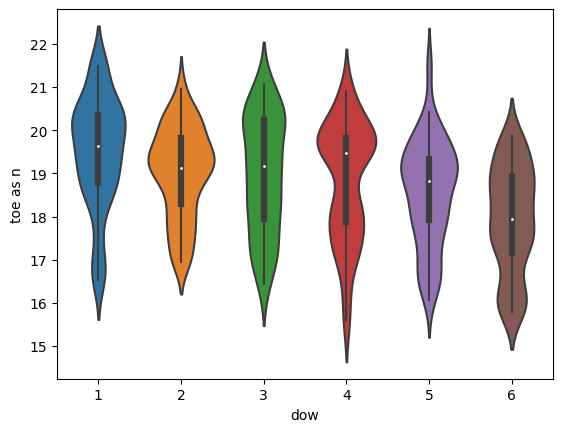

In [22]:
sns.violinplot(x='dow', y='toe as n', data=df, bw=0.35)

These plots tell me more about at what time people leave. It seems that on Wednesday (2), Friday (4) and Saturday (5), people leave around the same time. On Tuesday (1), Thursday (3) and Sunday (6), the `toe` is more spread out.

After confirming the earlier conclusion (<small>Guests leave earlier as the week progresses</small>) , I can asume that all the original assumption in chapter [2.1 Correlation matrix results](###2.1-Correlation-matrix-results) about `toe as n` in relation to `dow`, `is w` and `is nem` are incorrect (assumptions 1, 2 and 3 in that chapter). To summarize, the original assumption was that people leave at a later time as the week progresses. The latest when it's the weekend (`is w`) and if the next day is no early morning (`is nem`). But it seems that it is the opposite.

<small>*Side note: The purple blob shows hope for assumption 3 (`toe as n` vs `is nem`)*</small>

#### 2.2.2 Corr 2: `toe as n` and `is w`, and corr 3: `toe as n` and `is nem`

Based on the last conclusion, I can assume that the original assumption is incorrect for both these correlations (see below). And threfore the conclusion prediction will be correct. This will be proved in the charts below.

**First up: `toe as n` and `is w`**

<small>Correlation matrix score = -0.3</small>

Original assumption: `toe as n` is bigger if `is w` is true.
Original conclusion prediction: False -> the corr rating is negative

<AxesSubplot: xlabel='is w', ylabel='toe as n (mean)'>

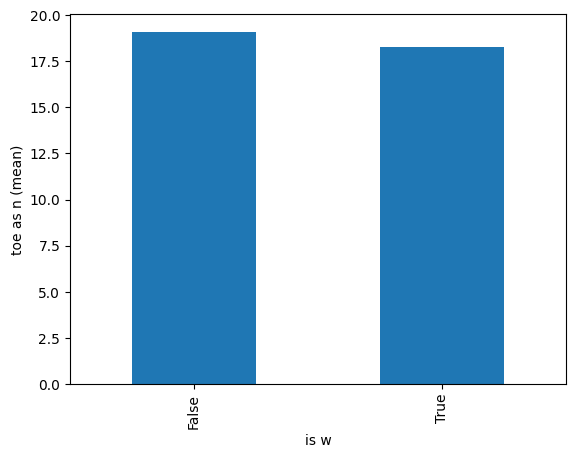

In [23]:
df[['toe as n', 'is w']].groupby('is w').mean().plot(kind='bar', legend=False, ylabel='toe as n (mean)')

Chart explained: The "False" bar being higher means that people leave later when it is not a weekend day. This proves that the original assumption was incorrect. Another observation is that the difference is very low. So it doesn't matter much anyway.

##### **Conclusion 2: People leave earlier in the weekend** The original assumption was incorrect and the original outcome prediction was correct. But minimal result

**Next up: `toe as n` and `is nem`**

Original assumption: `toe as n` is bigger if `is w` is true.
Original conclusion prediction: False -> the corr rating is negative

<AxesSubplot: xlabel='is nem', ylabel='toe as n (mean)'>

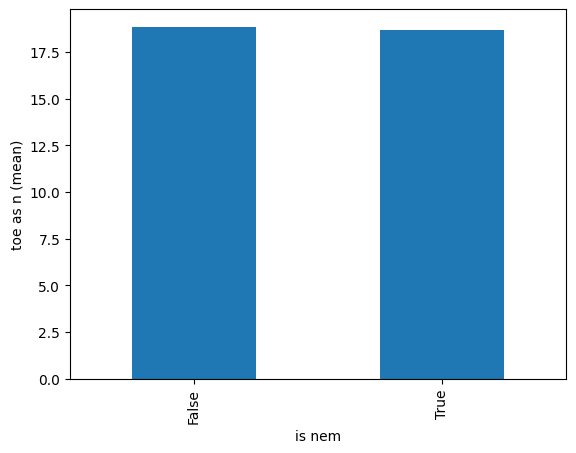

In [24]:
df[['toe as n', 'is nem']].groupby('is nem').mean().plot(kind='bar', legend=False, ylabel='toe as n (mean)')

Chart explained: The "False" bar being higher means that people leave later when it is not a weekend day. This proves that the original assumption was incorrect. Another observation is that the difference is very low. So it doesn't matter much anyway.

##### **Conclusion 3: `is nem` has no noticable influence on `toe as n`** The original assumption was incorrect and the original outcome prediction was correct.

#### 2.2.3 Corr 3: `toe as n` and `is nem`

<small>Correlation matrix score = -0.06</small>

Original assumption: `toe as n` is bigger if `is nem` is true. <br>
Original prediction outcome: False -> the corr rating is negative, but also very low. Probably no conclusion.

Based on the first conclusion, I can (again) assume that the original assumption is wrong. But let's try to prove it. Starting with a histogram...

In [25]:
# Doe die torrie hier swa

## Step 4: Summary

Yet to come ...